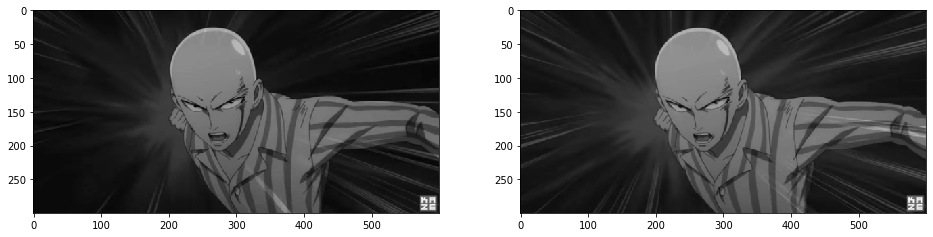

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

im1 = imread('1.png')
im2 = imread('2.png')
im1 = rgb2gray(im1)
im2 = rgb2gray(im2)
fig, ax = plt.subplots(1, 2, figsize=(16, 24))
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2, cmap='gray')

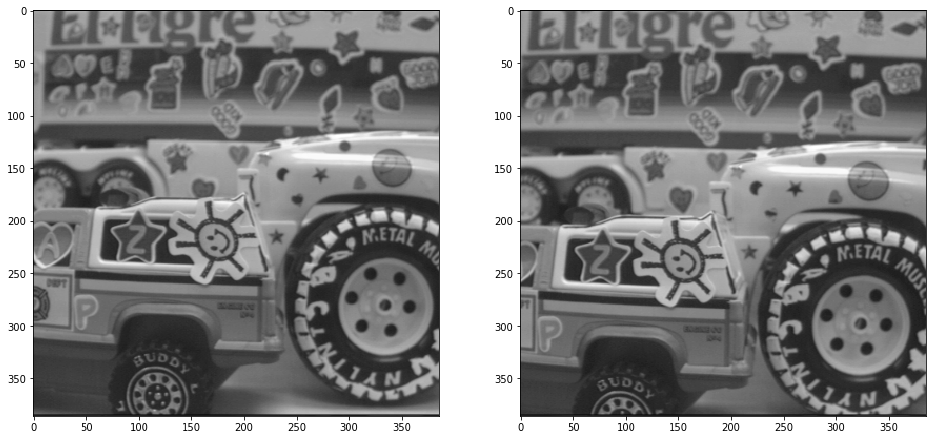

In [2]:
trucka = imread('trucka.bmp')
truckb = imread('truckb.bmp')
trucka = rgb2gray(trucka)
truckb = rgb2gray(truckb)
fig, ax = plt.subplots(1, 2, figsize=(16, 24))
ax[0].imshow(trucka, cmap='gray')
ax[1].imshow(truckb, cmap='gray')

In [4]:
def get_smoothness(row_index, col_index, motion_field):
    h, w = motion_field[0].shape
    d = np.array([motion_field[:, row_index, col_index]]).reshape(1, 2)
    if row_index > 0 and row_index < h - 1 and col_index > 0 and col_index < w - 1:
        dy0 = np.array([motion_field[:, row_index - 1, col_index - 1]]).reshape(1, 2)
        dy1 = np.array([motion_field[:, row_index - 1, col_index]]).reshape(1, 2)
        dy2 = np.array([motion_field[:, row_index - 1, col_index + 1]]).reshape(1, 2)
        dy3 = np.array([motion_field[:, row_index, col_index - 1]]).reshape(1, 2)
        dy4 = np.array([motion_field[:, row_index, col_index + 1]]).reshape(1, 2)
        dy5 = np.array([motion_field[:, row_index + 1, col_index - 1]]).reshape(1, 2)
        dy6 = np.array([motion_field[:, row_index + 1, col_index]]).reshape(1, 2)
        dy7 = np.array([motion_field[:, row_index + 1, col_index + 1]]).reshape(1, 2)
        dy = np.concatenate([dy0, dy1, dy2, dy3, dy4, dy5, dy6, dy7], axis=0)
        dx = np.repeat(d, 8, axis=0)
    elif row_index > 0 and row_index < h - 1 and col_index == 0:
        dy0 = np.array([motion_field[:, row_index - 1, col_index]]).reshape(1, 2)
        dy1 = np.array([motion_field[:, row_index - 1, col_index + 1]]).reshape(1, 2)
        dy2 = np.array([motion_field[:, row_index, col_index + 1]]).reshape(1, 2)
        dy3 = np.array([motion_field[:, row_index + 1, col_index]]).reshape(1, 2)
        dy4 = np.array([motion_field[:, row_index + 1, col_index + 1]]).reshape(1, 2)
        dy = np.concatenate([dy0, dy1, dy2, dy3, dy4], axis=0)
        dx = np.repeat(d, 5, axis=0)
    elif row_index > 0 and row_index < h - 1 and col_index == w - 1:
        dy0 = np.array([motion_field[:, row_index - 1, col_index - 1]]).reshape(1, 2)
        dy1 = np.array([motion_field[:, row_index - 1, col_index]]).reshape(1, 2)
        dy2 = np.array([motion_field[:, row_index, col_index - 1]]).reshape(1, 2)
        dy3 = np.array([motion_field[:, row_index + 1, col_index - 1]]).reshape(1, 2)
        dy4 = np.array([motion_field[:, row_index + 1, col_index]]).reshape(1, 2)
        dy = np.concatenate([dy0, dy1, dy2, dy3, dy4], axis=0)
        dx = np.repeat(d, 5, axis=0)
    elif col_index > 0 and col_index < w - 1 and row_index == 0:
        dy0 = np.array([motion_field[:, row_index, col_index - 1]]).reshape(1, 2)
        dy1 = np.array([motion_field[:, row_index, col_index + 1]]).reshape(1, 2)
        dy2 = np.array([motion_field[:, row_index + 1, col_index - 1]]).reshape(1, 2)
        dy3 = np.array([motion_field[:, row_index + 1, col_index]]).reshape(1, 2)
        dy4 = np.array([motion_field[:, row_index + 1, col_index + 1]]).reshape(1, 2)
        dy = np.concatenate([dy0, dy1, dy2, dy3, dy4], axis=0)
        dx = np.repeat(d, 5, axis=0)
    elif col_index > 0 and col_index < w - 1 and row_index == h - 1:
        dy0 = np.array([motion_field[:, row_index - 1, col_index - 1]]).reshape(1, 2)
        dy1 = np.array([motion_field[:, row_index - 1, col_index]]).reshape(1, 2)
        dy2 = np.array([motion_field[:, row_index - 1, col_index + 1]]).reshape(1, 2)
        dy3 = np.array([motion_field[:, row_index, col_index - 1]]).reshape(1, 2)
        dy4 = np.array([motion_field[:, row_index, col_index + 1]]).reshape(1, 2)
        dy = np.concatenate([dy0, dy1, dy2, dy3, dy4], axis=0)
        dx = np.repeat(d, 5, axis=0)
    elif col_index == 0 and row_index == 0:
        dy0 = np.array([motion_field[:, row_index, col_index + 1]]).reshape(1, 2)
        dy1 = np.array([motion_field[:, row_index + 1, col_index]]).reshape(1, 2)
        dy2 = np.array([motion_field[:, row_index + 1, col_index + 1]]).reshape(1, 2)
        dy = np.concatenate([dy0, dy1, dy2], axis=0)
        dx = np.repeat(d, 3, axis=0)
    elif col_index == w - 1 and row_index == h - 1:
        dy0 = np.array([motion_field[:, row_index - 1, col_index - 1]]).reshape(1, 2)
        dy1 = np.array([motion_field[:, row_index - 1, col_index]]).reshape(1, 2)
        dy2 = np.array([motion_field[:, row_index, col_index - 1]]).reshape(1, 2)
        dy = np.concatenate([dy0, dy1, dy2], axis=0)
        dx = np.repeat(d, 3, axis=0)

    return np.linalg.norm(np.array(dx, dtype=np.float32) - np.array(dy, dtype=np.float32), ord=2)


In [6]:
def EBMA(current_frame, reference_frame, block_size, search_range, alpha):

    h, w = current_frame.shape
    motion_field = np.empty((2, (h // block_size + 1), (w // block_size + 1)), dtype=np.int16)

    for row in range(0, h, block_size):
        for col in range(0, w, block_size):
            
            min_metric = np.inf
            current_block = current_frame[row:row + block_size, col:col + block_size]

            row_min = max(0, row - search_range)
            row_max = min(row + block_size + search_range, h)
            col_min = max(0, col - search_range)
            col_max = min(w, col + block_size + search_range)

            for row_search in range(row_min, row_max - current_block.shape[0]):
                for col_search in range(col_min, col_max - current_block.shape[1]):

                    search_block = reference_frame[row_search:row_search + current_block.shape[0], col_search:col_search + current_block.shape[1]]
                    assert search_block.shape == current_block.shape

                    block_metric = np.linalg.norm(np.array(search_block, dtype=np.float32) - np.array(current_block, dtype=np.float32), ord=1)
                    if block_metric < min_metric:
                        min_metric = block_metric
                        dy = int(row_search - row)
                        dx = int(col_search - col)

            motion_field[0, row // block_size, col // block_size] = dx
            motion_field[1, row // block_size, col // block_size] = dy

    if alpha > 0:
        for row in range(0, h, block_size):
            for col in range(0, w, block_size):

                min_metric = np.inf
                current_block = current_frame[row:row + block_size, col:col + block_size]

                row_min = max(0, row - search_range)
                row_max = min(row + block_size + search_range, h)
                col_min = max(0, col - search_range)
                col_max = min(w, col + block_size + search_range)

                for row_search in range(row_min, row_max - current_block.shape[0]):
                    for col_search in range(col_min, col_max - current_block.shape[1]):

                        search_block = reference_frame[row_search:row_search + current_block.shape[0], col_search:col_search + current_block.shape[1]]
                        assert search_block.shape == current_block.shape

                        block_metric = np.linalg.norm(np.array(search_block, dtype=np.float32) - np.array(current_block, dtype=np.float32), ord=1)
                        smoothness_metric = get_smoothness(row_search // block_size, col_search // block_size, motion_field)
                        
                        if block_metric + alpha * smoothness_metric < min_metric:
                            min_metric = block_metric
                            dy = row_search - row
                            dx = col_search - col

                motion_field[0, row // block_size, col // block_size] = dx
                motion_field[1, row // block_size, col // block_size] = dy
    
    return motion_field

In [37]:
def display(img, motion_field, block_size, size=(10, 10), sample=-1):
    fig, ax = plt.subplots(1, 1, figsize=size)
    ax.imshow(img, cmap='gray')
    X, Y = np.meshgrid(np.arange(0, img.shape[1], block_size), np.arange(0, img.shape[0], block_size))
    if sample == -1:
        ax.quiver(X, Y, motion_field[0], -motion_field[1], color='red')
    else:
        ax.quiver(X[::sample, ::sample], Y[::sample, ::sample], motion_field[0, ::sample, ::sample], -motion_field[1, ::sample, ::sample], color='red')
    ax.axis('off')

# 1)
## A)

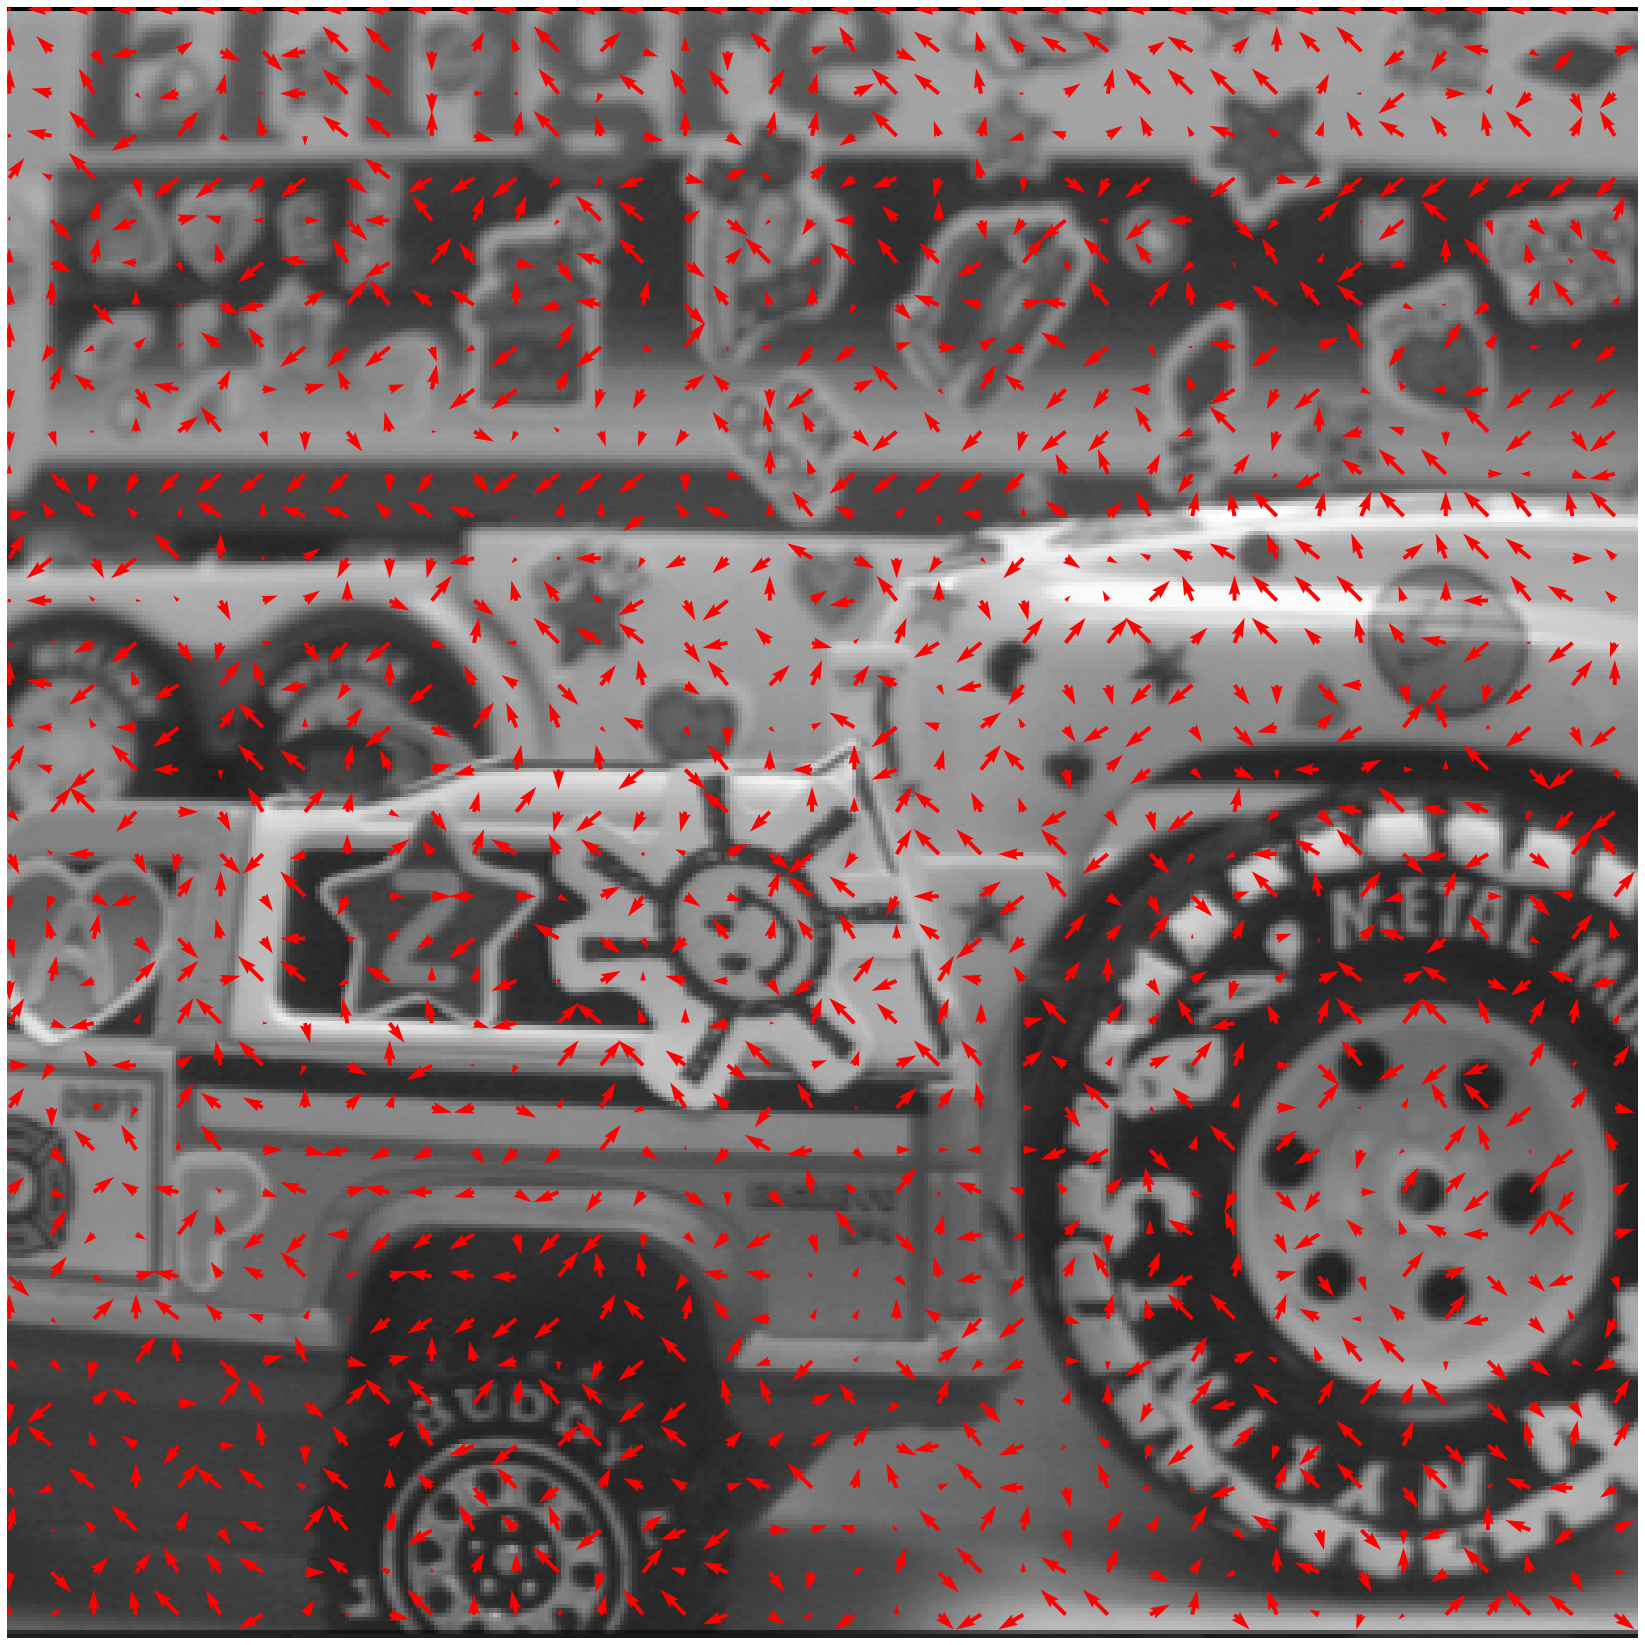

In [38]:
motion_field = EBMA(trucka, truckb, 1, 5, alpha=0)
display(trucka, motion_field, 1, (30, 30), 10)

## B)

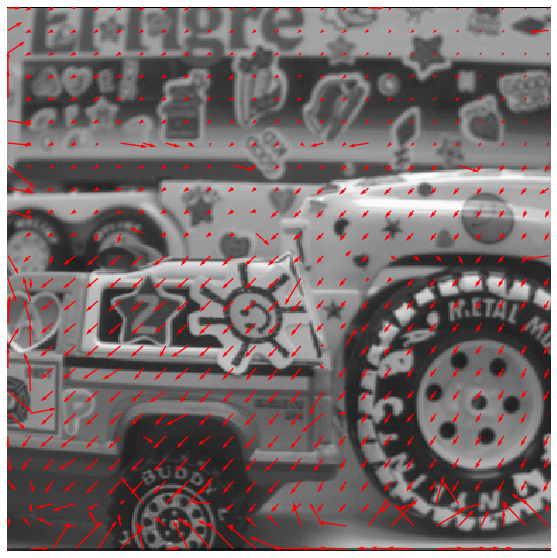

In [39]:
motion_field = EBMA(trucka, truckb, 16, 50, alpha=0)
display(trucka, motion_field, 16)

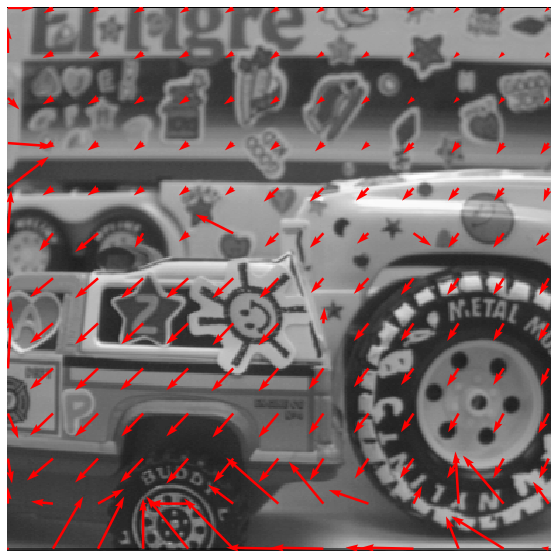

In [40]:
motion_field = EBMA(trucka, truckb, 32, 50, alpha=0)
display(trucka, motion_field, 32)

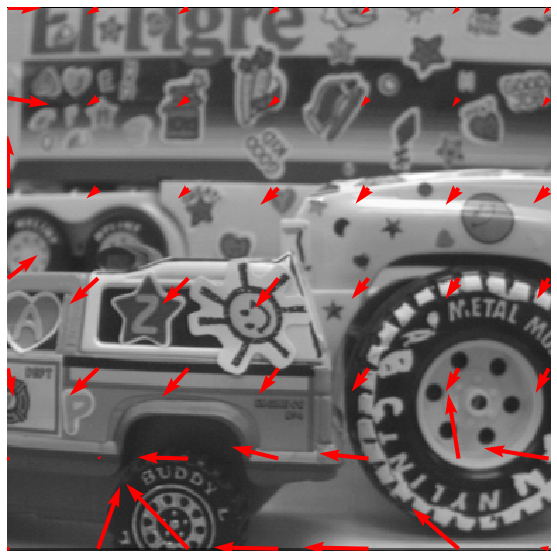

In [41]:
motion_field = EBMA(trucka, truckb, 64, 50, alpha=0)

display(trucka, motion_field, 64)

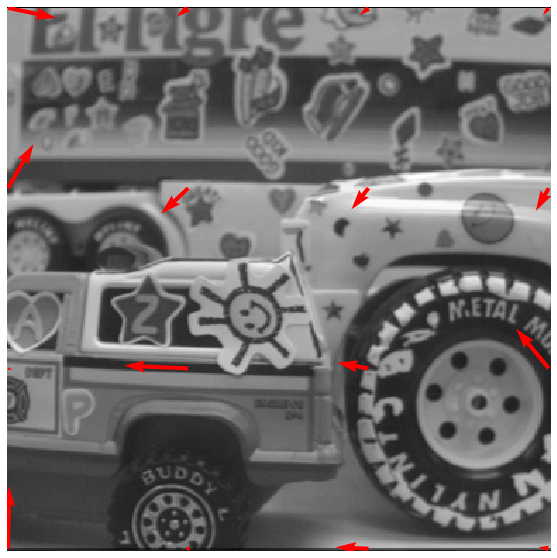

In [42]:
motion_field = EBMA(trucka, truckb, 128, 50, alpha=0)

display(trucka, motion_field, 128)

## C)

Les vecteurs de mouvement pointent vers la zone vers laquelle va se deplacer le bloc dans l'image F2. On a représenté ici l'image F1.

Il semble que l'utilisation d'un méthode d'estimation de mouvement 'pixel wise' donne un résultat très bruité avec des pixels proches ayant un mouvement contraire. A l'inverse, l'utilisation de blocs permet naturellement de régulariser de manière à avoir un champ plus uniforme et lisse. Plus les blocs sont gros et plus le rendu est lisse.

Par ailleurs, on a un problème sur certains bords des images. Cela est lié au fait que certains blocs dans l'image F1 ne sont plus présent dans l'image F2. Par conséquent, le matching block trouvé pour ces blocs prochent des bords de l'image (ici bord gauche et bord du bas de l'image) est très peu précis voir incohérent.

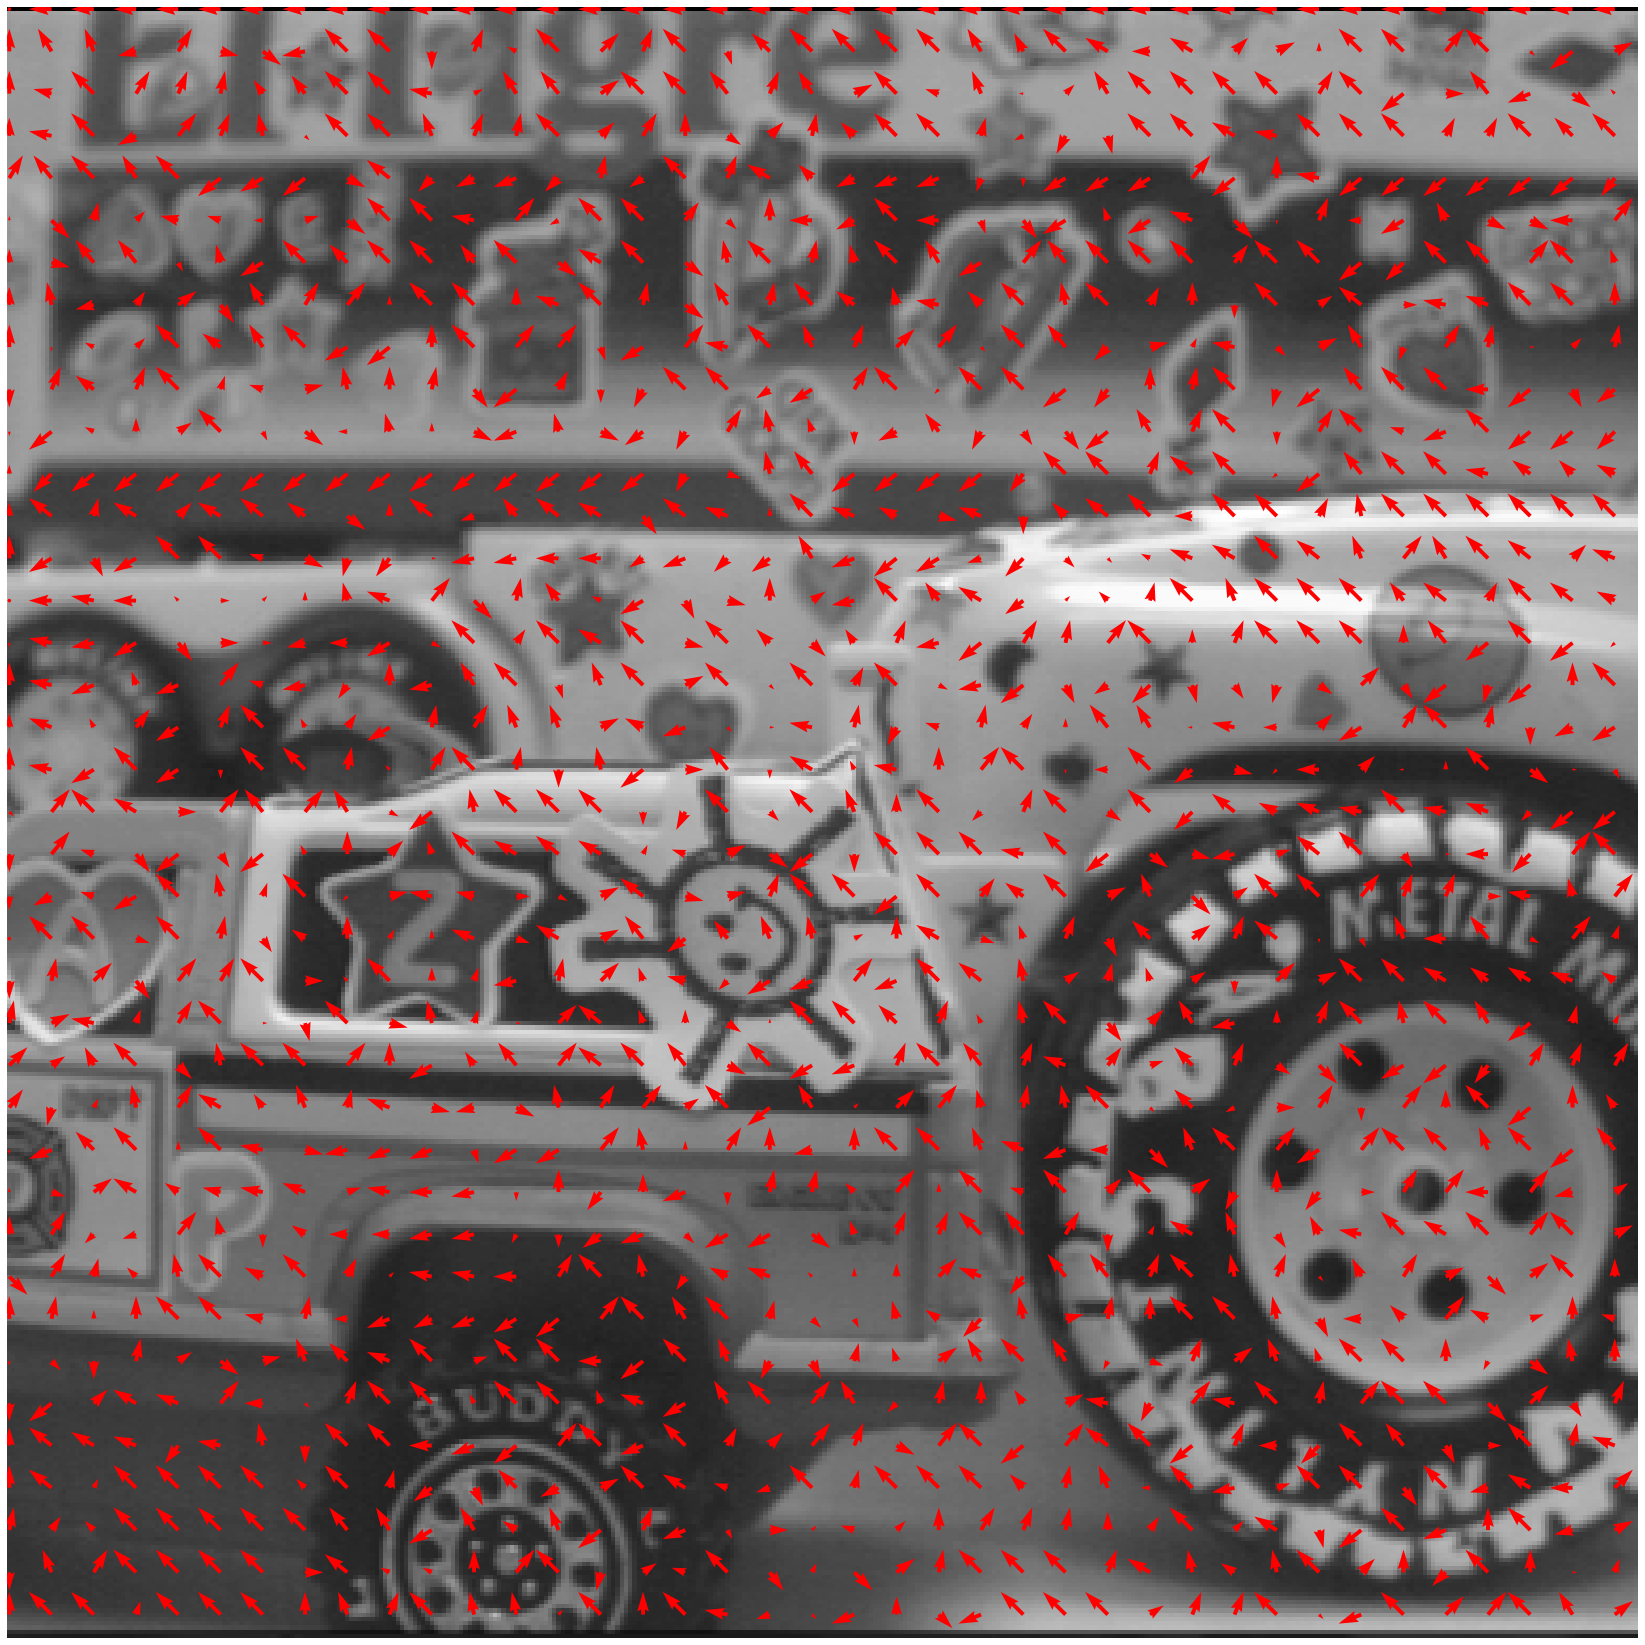

In [43]:
motion_field = EBMA(trucka, truckb, 1, 5, alpha=1)

display(trucka, motion_field, 1, (30, 30), 10)

## D)
Le champ de vecteur obtenu après regularisation reste assez éloigné du flow optique. En effet, même si l'on constate que cela est plus lisse, les mouvements sont toujours souvent en sens contraire pour des zones assez proche ce qui ne représente pas bien la difference que l'on semble percevoir entre les deux images. En faisant tourner l'algorithme avec un alpha plus grand on obtiendrait des mouvements plus uniformes et lisses (mais le temps d'execution est trop long).

# 2)
## a)

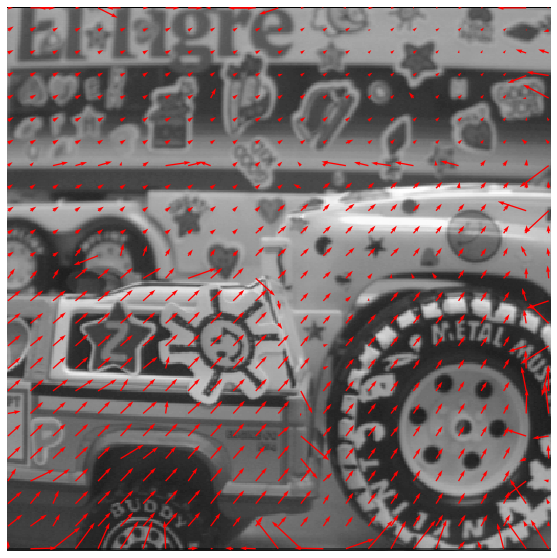

In [45]:
block_size = 16
motion_field = EBMA(truckb, trucka, block_size, 50, alpha=0)

display(truckb, motion_field, block_size)

## b)
On constate que les problèmes que l'on avait sur les bords de l'image sont toujours présent mais concernent cette fois ci le bord droit et le bord du bas de l'image. Cela résulte du fait que les blocs situés sur ces bord de l'image F2 n'étaient pas présent dans la frame F1.   
Les vecteurs de mouvement pointent vers la zone où se trouvait le bloc dans la frame precedente F1. C'est à dire dans le sens opposé au vecteurs de mouvements dans la partie 1). On a représenté ici l'image F2.  
Sur les bords de l'image, et notamment le bord droit de l'image ici, les blocs présent dans la frame 2 n'étaient pas présent dans la frame 1 (car le deplacement est vers la gauche de l'image) donc l'algorithme a du mal à trouver un bloc correspondant dans la frame F1 ce qui est normal. Par conséquent la direction des vecteurs de mouvement sur certains bords de l'image ont tendance à être illogique (il faut bien que l'algorithme trouve un matching bloc quand même).

## c)

In [46]:
def predict_frame(F1, motion_field, block_size):
    h, w = F1.shape
    predicted_frame = np.zeros(F1.shape)
    for row in range(0, h, block_size):
        for col in range(0, w, block_size):
            dy = motion_field[1, row // block_size, col // block_size]
            dx = motion_field[0, row // block_size, col // block_size]
            block_size_x = min(w, col + block_size) - col
            block_size_y = min(h, row + block_size) - row
            predicted_frame[row:row + block_size, col:col + block_size] = F1[row + dy:row + dy + block_size, col + dx:col + dx + block_size][:block_size_y, :block_size_x]
    return predicted_frame

Quand la taille du bloc n'est pas un diviseur de la taille de l'image en x ou y, on trouve des pixels noirs sur le bord de l'image. Pour éviter cet artefact, on a tronqué la taille du bloc seulement pour les blocs près des bords de l'image (dernière colonne et dernière ligne de blocs). La nouvelle valeur de ces blocs est égale à la valeur minimum entre la taille d'un bloc et l'espace séparant le dernier bloc du bord de l'image.

(-0.5, 385.5, 385.5, -0.5)

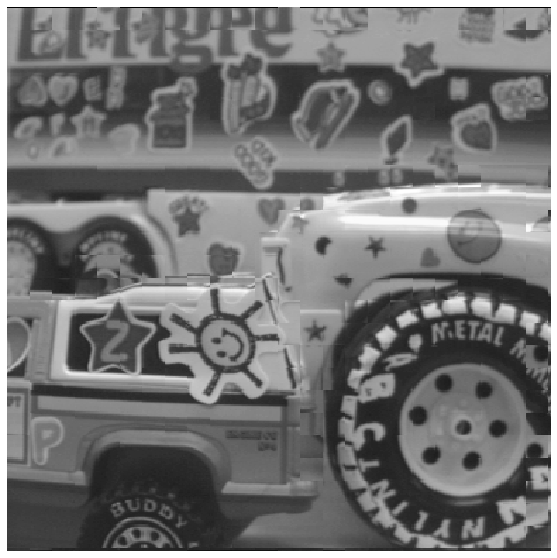

In [47]:
motion_compensated_frame = predict_frame(trucka, motion_field, block_size)
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.imshow(motion_compensated_frame, cmap='gray')
ax.axis('off')

## D)

Les trois données classiques dont on a besoin pour reconstruire la frame de façon parfaite sont:  

    - La frame de reference F1  

    - Les motions vectors  
    
    - La residual frame resultant de la différence entre F2 et l'image prédite par la phase de motion estimation

Pour reconstruire de façon parfaite on va prédire la frame F2 à partir de F1 et les motions vectors (motion compensated frame). Ensuite, en ajoutant cette frame de prediction (qui n'est pas parfaite) à la residual frame on obtient F2 de façon parfaite.

(-0.5, 385.5, 385.5, -0.5)

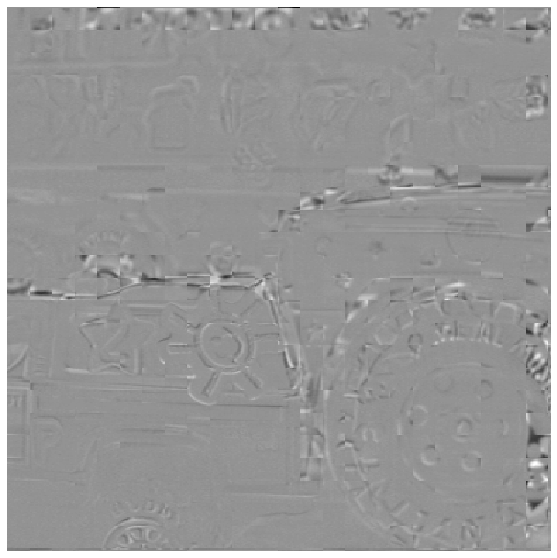

In [51]:
residual_frame = truckb - motion_compensated_frame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(residual_frame, cmap='gray')
ax.axis('off')

## E)

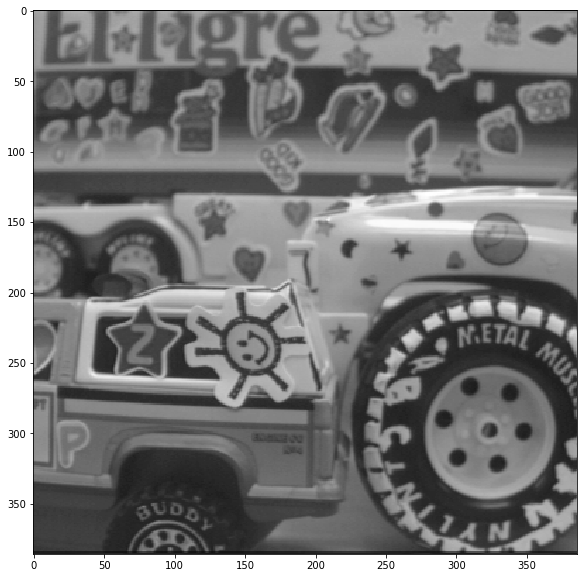

In [52]:
test = motion_compensated_frame + residual_frame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(test, cmap='gray')

# 3)
## A)
On va chercher à coder la residual frame en utilisant, par exemple, la DCT puis quantisation puis RLE et Huffman. Plus l'erreur de reconstruction est faible et moins la residual frame va contenir d'information et donc plus il sera facile de compresser. 

## B)
Pour nos test, on va utiliser le format jpeg avec differentes qualités pour analyser le compromis qualité/taille du fichier. On utilise openCV pour sauvegarder la residual frame avec différents niveaux de qualité. Le but est ici de réduire la taille de la frame d'erreur car c'est une image qui contient moins d'information donc son alteration sera moins visible.

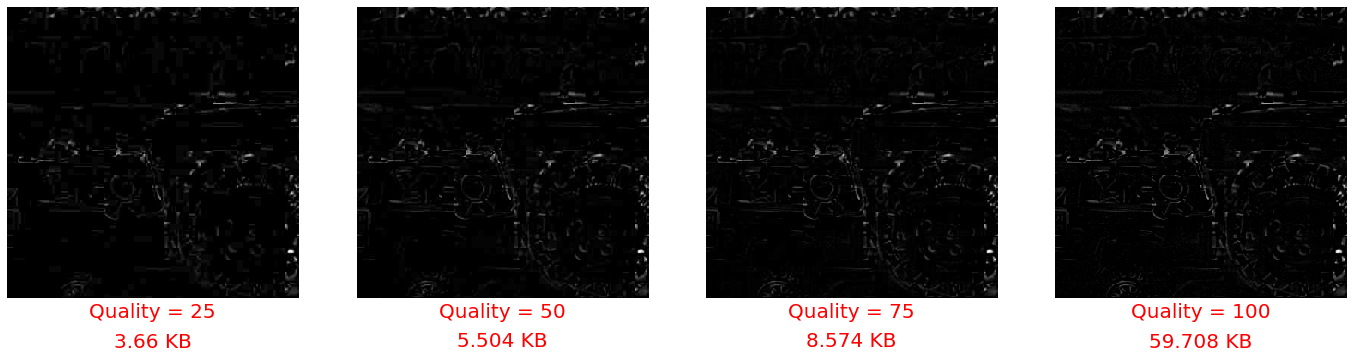

In [90]:
import os

qualities=[25, 50, 75, 100]
fig, ax = plt.subplots(1, 4, figsize=(24, 10))
for i, quality in zip(range(4), qualities):
    cv2.imwrite('residual_frame.jpg', residual_frame, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    test = cv2.imread('residual_frame.jpg', cv2.IMREAD_GRAYSCALE)
    ax[i].imshow(test, cmap='gray')
    ax[i].axis('off')
    ax[i].text(0.5, -0.05, 'Quality = {}'.format(quality), horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes, fontsize=20, color='red')
    ax[i].text(0.5, -0.15, '{} KB'.format(os.stat('residual_frame.jpg').st_size / 1000), horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes, fontsize=20, color='red')

On constate qu'en fixant la qualité à 75, on divise déjà la taille de la residual frame par 7. Ensuite si on ajoute cette residual frame compressée à la motion compensated frame obtenu à la question 2)c) on obtient une image correcte et l'information qui a été détruite par jpeg ne devrait pas trop se voir. Cependant ici pour sauvegarder l'image en jpeg on est obligé de faire la valeur absolu de manière a ne pas avoir de pixels négatifs. Par conséquent cette residual frame ne ressemble pas à celle de la question 2)D). Donc comme certains pixels sont mis à zero, en ajoutant cette residual frame en valeur absolue à la motion compensated frame, on obtiendrait pas une reconstruction parfaite, même avec une qualité de 100 c'est à dire sans compresser l'image d'erreur.

## C)

Dans l'approche mesh-based, le deplacement de chaque point d'un polygone se calcul comme une interpolation des déplacements des n nodes du polygone. 

Dans le cas d'un polygone à trois nodes, le kernel représente une fonction affine. Dans le cas d'un polygone à quatre nodes, le kernel est une fonction bilinéaire. Dans le cas d'un polygone à un seul node (ce que nous avons traité plus haut dans ce tp), le kernel représente une translation.  

Du point de vue de la minimisation, on va toujours chercher à minimiser la DFD mais le calcul de cette DFD sera différent. En particulier le calcul du matching block dans la frame de reference va se faire en multipliant les motions vectors à chaque node du polygone par leur kernel d'interpolation correspondant. Ce kernel correspond à la contribution d'un node du polygone pour obtenir le motion vector.  

Par ailleurs, ce kernel d'interpolation doit satisfaire certaines contraintes pour s'assurer de la continuité entre les blocs:  
- Le kernel d'un node d'un polygone doit être compris entre 0 et 1.  
- La somme des kernels d'un polygone doit être égal à 1.  

En utilisant une approche mesh-based, on aurait eu moins de discontinuités à la frontière entre les blocs et globalement l'image reconstruite aurait été plus lisse. Le motion field aurait été moins chaotique.

In [10]:
from skimage.io import imsave

error_image = np.abs(predicted_frame - im2)
imsave('error_image.png', error_image)
#mse = np.square(error_image).mean()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [39]:
def show_quiver(x_component_arrows, y_components_arrows):
    plt.quiver(x_component_arrows, y_components_arrows)
    plt.show()


def subarray(array, upper_left_pix, lower_right_pix_col):
    upper_left_pix_row = upper_left_pix[0]
    upper_left_pix_col = upper_left_pix[1]
    lower_right_pix_row = lower_right_pix_col[0]
    lower_right_pix_col = lower_right_pix_col[1]
    """
    Return a subarray containing the pixels delimited by the pixels between upper_left_pix and lower_right.
    If asked for pixels outside the image boundary, such pixels have value 0.
    """

    if upper_left_pix_row > lower_right_pix_row or upper_left_pix_col > lower_right_pix_col:
        raise ValueError('coordinates of the subarray should correspond to a meaningful rectangle')

    orig_array = np.array(array)

    num_rows = lower_right_pix_row - upper_left_pix_row + 1
    num_cols = lower_right_pix_col - upper_left_pix_col + 1

    subarr = np.zeros((num_rows, num_cols), dtype=orig_array.dtype)

    # zoomed outside the original image
    if lower_right_pix_col < 0 or lower_right_pix_row < 0 or \
                    upper_left_pix_col > orig_array.shape[1] - 1 or upper_left_pix_row > orig_array.shape[0] - 1:
        return subarr

    # region of the original image that is inside the desired region
    # (i = col, j=row)
    # _________________________________
    # |                                | original image
    # |   _____________________________|____
    # |   |(j_o_1, i_o_1)              |    |
    # |   |             (j_o_2, i_o_2) |    |
    # |___|____________________________|    |
    # |                                 |
    # |_________________________________|  sliced final image

    if upper_left_pix_col < 0:
        i_o_1 = 0
    else:
        i_o_1 = upper_left_pix_col
    if upper_left_pix_row < 0:
        j_o_1 = 0
    else:
        j_o_1 = upper_left_pix_row

    if lower_right_pix_col > orig_array.shape[1] - 1:
        i_o_2 = orig_array.shape[1] - 1
    else:
        i_o_2 = lower_right_pix_col
    if lower_right_pix_row > orig_array.shape[0] - 1:
        j_o_2 = orig_array.shape[0] - 1
    else:
        j_o_2 = lower_right_pix_row


    # region of the final image that is inside the original image, and whose content will be taken from the orig im
    # (i = col, j=row)
    # _________________________________
    # |                                | original image
    # |   _____________________________|____
    # |   |(j_f_1, i_f_1)              |    |
    # |   |             (j_f_2, i_f_2) |    |
    # |___|____________________________|    |
    #     |                                 |
    #     |_________________________________|  sliced final image

    if upper_left_pix_col < 0:
        i_f_1 = -upper_left_pix_col
    else:
        i_f_1 = 0
    if upper_left_pix_row < 0:
        j_f_1 = -upper_left_pix_row
    else:
        j_f_1 = 0

    if lower_right_pix_col > orig_array.shape[1] - 1:
        i_f_2 = (orig_array.shape[1] - 1) - upper_left_pix_col
    else:
        i_f_2 = num_cols - 1
    if lower_right_pix_row > orig_array.shape[0] - 1:
        j_f_2 = (orig_array.shape[0] - 1) - upper_left_pix_row
    else:
        j_f_2 = num_rows - 1

    subarr[j_f_1:j_f_2 + 1, i_f_1:i_f_2 + 1] = orig_array[j_o_1:j_o_2 + 1, i_o_1:i_o_2 + 1]

    return subarr

In [42]:
class EBMA_searcher():
    """
    Estimates the motion between to frame images
     by running an Exhaustive search Block Matching Algorithm (EBMA).
    Minimizes the norm of the Displaced Frame Difference (DFD).
    """

    def __init__(self, N, R, p=1, acc=1):
        """
        :param N: Size of the blocks the image will be cut into, in pixels.
        :param R: Range around the pixel where to search, in pixels.
        :param p: Norm used for the DFD. p=1 => MAD, p=2 => MSE. Default: p=1.
        :param acc: 1: Integer-Pel Accuracy (no interpolation),
                    2: Half-Integer Accuracy (Bilinear interpolation)
        """

        self.N = N
        self.R = R
        self.p = p
        self.acc = acc

    def run(self, anchor_frame, target_frame):
        """
        Run!
        :param anchor_frame: Image that will be predicted.
        :param target_frame: Image that will be used to predict the target frame.
        :return: A tuple consisting of the predicted image and the motion field.
        """

        acc = self.acc
        height = anchor_frame.shape[0]
        width = anchor_frame.shape[1]
        N = self.N
        R = self.R
        p = self.p

        # interpolate original images if half-pel accuracy is selected
        if acc == 1:
            pass
        elif acc == 2:
            target_frame = cv.resize(target_frame, dsize=(width * 2, height * 2))
        else:
            raise ValueError('pixel accuracy should be 1 or 2. Got %s instead.' % acc)

        # predicted frame. anchor_frame is predicted from target_frame
        predicted_frame = np.empty((height, width), dtype=np.uint8)

        # motion field consisting in the displacement of each block in vertical and horizontal
        motion_field = np.empty((int(height / N), int(width / N), 2))

        # loop through every NxN block in the target image
        for (blk_row, blk_col) in itertools.product(range(0, height - (N - 1), N),
                                                    range(0, width - (N - 1), N)):

            # block whose match will be searched in the anchor frame
            blk = anchor_frame[blk_row:blk_row + N, blk_col:blk_col + N]

            # minimum norm of the DFD norm found so far
            dfd_n_min = np.infty

            # search which block in a surrounding RxR region minimizes the norm of the DFD. Blocks overlap.
            for (r_col, r_row) in itertools.product(range(-R, (R + N)),
                                                    range(-R, (R + N))):
                # candidate block upper left vertex and lower right vertex position as (row, col)
                up_l_candidate_blk = ((blk_row + r_row) * acc, (blk_col + r_col) * acc)
                low_r_candidate_blk = ((blk_row + r_row + N - 1) * acc, (blk_col + r_col + N - 1) * acc)

                # don't search outside the anchor frame. This lowers the computational cost
                if up_l_candidate_blk[0] < 0 or up_l_candidate_blk[1] < 0 or \
                                low_r_candidate_blk[0] > height * acc - 1 or low_r_candidate_blk[1] > width * acc - 1:
                    continue

                # the candidate block may fall outside the anchor frame
                candidate_blk = subarray(target_frame, up_l_candidate_blk, low_r_candidate_blk)[::acc, ::acc]
                assert candidate_blk.shape == (N, N)

                dfd = np.array(candidate_blk, dtype=np.float16) - np.array(blk, dtype=np.float16)

                candidate_dfd_norm = np.linalg.norm(dfd, ord=p)

                # a better matching block has been found. Save it and its displacement
                if candidate_dfd_norm < dfd_n_min:
                    dfd_n_min = candidate_dfd_norm
                    matching_blk = candidate_blk
                    dy = r_col
                    dx = r_row

            # construct the predicted image with the block that matches this block
            predicted_frame[blk_row:blk_row + N, blk_col:blk_col + N] = matching_blk

            # displacement of this block in each direction
            motion_field[blk_row // N, blk_col // N, 1] = dx
            motion_field[blk_row // N, blk_col // N, 0] = dy

        return predicted_frame, motion_field

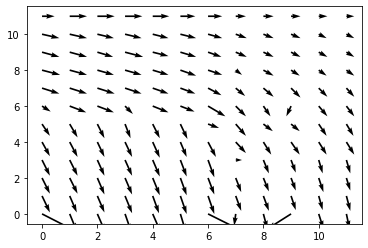

In [46]:
import itertools

ebma = EBMA_searcher(N=31,
                         R=31,
                         p=1,
                         acc=1)

predicted_frm, motion_field = ebma.run(anchor_frame=truckb, target_frame=trucka)

motion_field_x = motion_field[:, :, 0]
motion_field_y = motion_field[:, :, 1]

# show motion field
show_quiver(motion_field_x, motion_field_y[::-1])